In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pickle

from chromaball.team import *

In [3]:
plt.style.use('seaborn-v0_8-colorblind')
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [7]:
# format is: [ team_name, RGB values (len 3), (tackles_home, tackles_away), (completions_home, completions_away) ]
with open('nfl2020_data.pkl', 'rb') as fp:
    data = pickle.load(fp)
    print('nfl data incoming...')

nfl data incoming...


In [14]:
for t in data.keys():
    print(data[t][0:3])
    data[t][0:3] /= 255
    print(data[t][0:3])

[151.  35.  63.]
[0.59215686 0.1372549  0.24705882]
[167.  25.  48.]
[0.65490196 0.09803922 0.18823529]
[26. 25. 95.]
[0.10196078 0.09803922 0.37254902]
[  0.  51. 141.]
[0.         0.2        0.55294118]
[  0. 133. 202.]
[0.         0.52156863 0.79215686]
[11. 22. 42.]
[0.04313725 0.08627451 0.16470588]
[251.  79.  20.]
[0.98431373 0.30980392 0.07843137]
[49. 29.  0.]
[0.19215686 0.11372549 0.        ]
[  0.  53. 148.]
[0.         0.20784314 0.58039216]
[251.  79.  20.]
[0.98431373 0.30980392 0.07843137]
[  0. 118. 182.]
[0.         0.4627451  0.71372549]
[24. 48. 40.]
[0.09411765 0.18823529 0.15686275]
[ 3. 32. 47.]
[0.01176471 0.1254902  0.18431373]
[ 0. 44. 95.]
[0.         0.17254902 0.37254902]
[16. 24. 32.]
[0.0627451  0.09411765 0.1254902 ]
[227.  24.  55.]
[0.89019608 0.09411765 0.21568627]
[  0.  53. 148.]
[0.         0.20784314 0.58039216]
[  0. 128. 198.]
[0.         0.50196078 0.77647059]
[0. 0. 0.]
[0. 0. 0.]
[  0. 142. 151.]
[0.         0.55686275 0.59215686]
[ 79.  38. 

In [15]:
field_green = np.array([96,185,34]) / 255
field_green

array([0.37647059, 0.7254902 , 0.13333333])

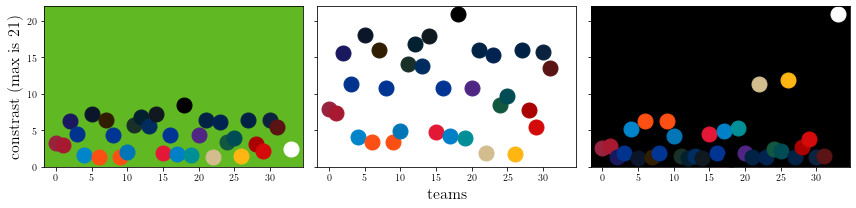

In [24]:
fig, axs = plt.subplots(1,3, figsize=(12,3), sharey=True)

background = [field_green, [1.,1.,1.], [0.,0.,0]]

for ax, back in zip(axs, background):
    ax.set_facecolor(back)   
    i = 0
    #fig, ax = plt.subplots(1,1, figsize=(10,8))
    for t in data.keys():
        team = Team(t, data[t][0:3], data[t][3], data[t][4], data[t][5], data[t][6])
        contrast = team.contrast(team.color_home, color2=np.asarray(back))
        ax.plot(i, contrast, marker='.', markersize=30, color=team.color_home)
        i += 1
        
    contrast = team.contrast(team.color_away, color2=np.asarray(back))
    ax.plot(i+1, contrast, marker='.', markersize=30, color=team.color_away)
    
axs[0].set_ylabel('constrast (max is 21)',fontsize=16)
axs[1].set_xlabel('teams', fontsize=16)
fig.tight_layout()

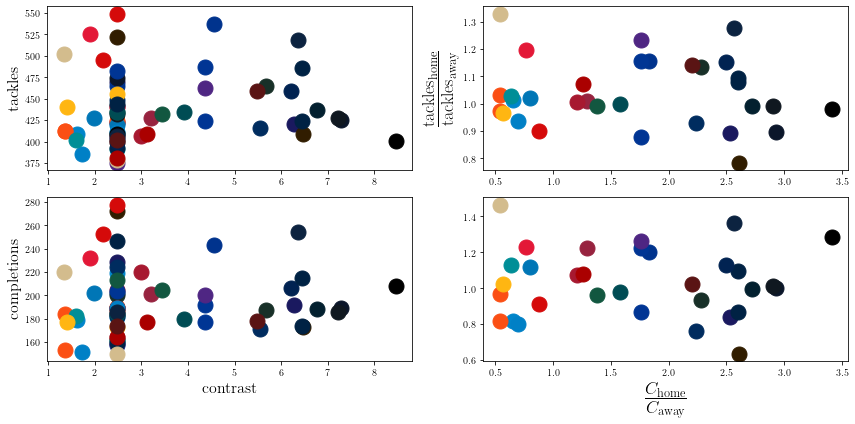

In [32]:
fig, ax = plt.subplots(2,2, figsize=(12,6))

n_teams = (len(data))
C_ratio = np.zeros(n_teams)
tackles_ratio = np.zeros(n_teams)
completions_ratio = np.zeros(n_teams)

i = 0
for t in data.keys():
    team = Team(t, data[t][0:3], data[t][3], data[t][4], data[t][5], data[t][6])
    contrast_home = team.contrast(team.color_home, color2=np.asarray(team.color_field))
    contrast_away = team.contrast(team.color_away, color2=np.asarray(team.color_field))
    
    ax[0,0].plot(contrast_home, team.tackles_home, marker='.', markersize=30, color=team.color_home)
    ax[0,0].plot(contrast_away, team.tackles_away, marker='.', markersize=30, color=team.color_home)
    
    ax[1,0].plot(contrast_home, team.completions_home, marker='.', markersize=30, color=team.color_home)
    ax[1,0].plot(contrast_away, team.completions_away, marker='.', markersize=30, color=team.color_home)
    
    C_ratio[i] = contrast_home / contrast_away
    tackles_ratio[i] = team.tackles_home / team.tackles_away
    completions_ratio[i] = team.completions_home / team.completions_away

    ax[0,1].plot(C_ratio[i],  tackles_ratio[i], marker='.', markersize=30, color=team.color_home)
    ax[1,1].plot(C_ratio[i],  completions_ratio[i], marker='.', markersize=30, color=team.color_home)
    
#     path = f'logos/{t}.png'
#     ab = AnnotationBbox(getImage(path), (C_ratio[i], tackle_ratio[i]), frameon=False)
#     ax[1].add_artist(ab)

    i += 1

ax[0,0].set_ylabel('tackles',fontsize=16)

ax[1,0].set_xlabel(r'contrast', fontsize=16) 
ax[1,0].set_ylabel(r'completions', fontsize=16) 

ax[1,1].set_xlabel(r'$\frac{C_{\mathrm{home}}}{C_{\mathrm{away}}}$', fontsize=25)    
ax[0,1].set_ylabel(r'$\frac{\mathrm{tackles}_{\mathrm{home}}}{\mathrm{tackles}_{\mathrm{away}}}$',fontsize=25)

fig.tight_layout()

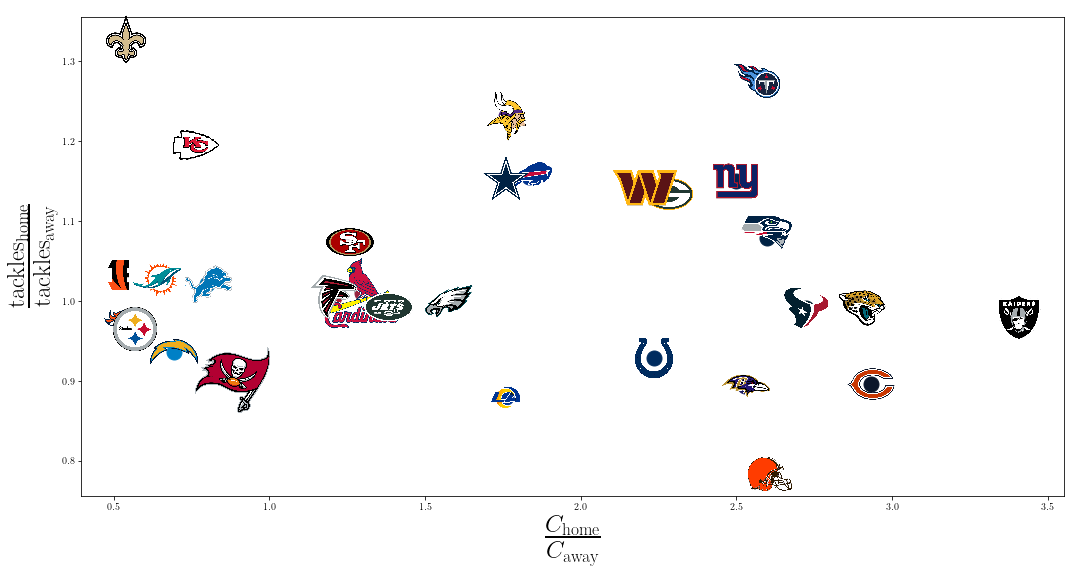

In [20]:
fig, ax = plt.subplots(1,1, figsize=(16,8))

n_teams = (len(data))
C_ratio = np.zeros(n_teams)
tackle_ratio = np.zeros(n_teams)

i = 0
for t in data.keys():
    team = Team(t, data[t][0:3], data[t][3], data[t][4])
    contrast_home = team.contrast(team.color_home, color2=np.asarray(team.color_field))
    contrast_away = team.contrast(team.color_away, color2=np.asarray(team.color_field))

    C_ratio[i] = contrast_home / contrast_away
    tackle_ratio[i] = team.tackles_home / team.tackles_away

    ax.plot(C_ratio[i],  tackle_ratio[i], marker='.', markersize=30, color=team.color_home)
    
    path = f'logos/{t}.png'
    ab = AnnotationBbox(getImage(path), (C_ratio[i], tackle_ratio[i]), frameon=False)
    ax.add_artist(ab)

    i += 1

ax.set_xlabel(r'$\frac{C_{\mathrm{home}}}{C_{\mathrm{away}}}$', fontsize=35)    
ax.set_ylabel(r'$\frac{\mathrm{tackles}_{\mathrm{home}}}{\mathrm{tackles}_{\mathrm{away}}}$',fontsize=35)

fig.tight_layout()

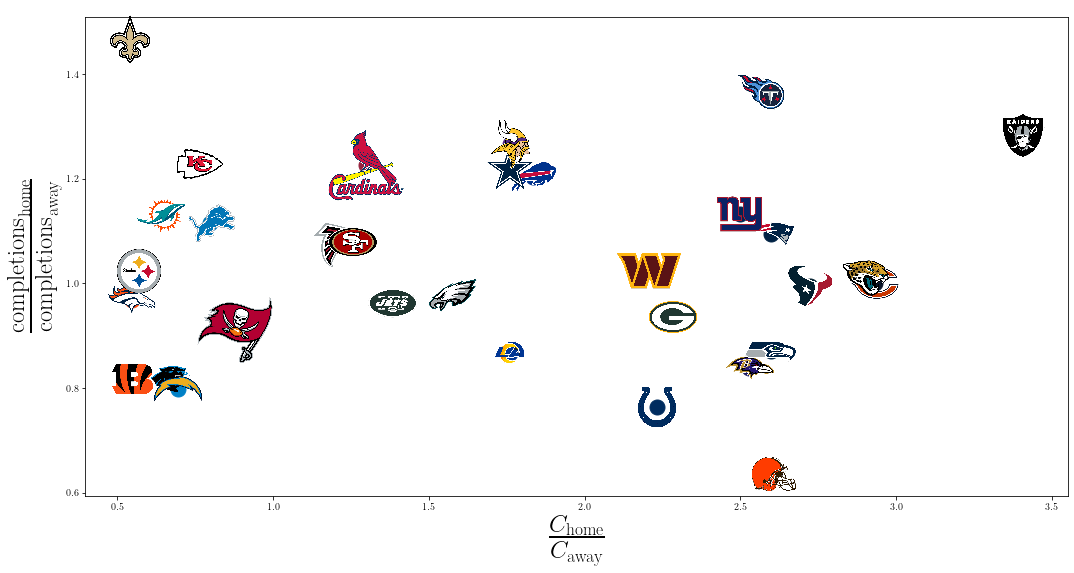

In [36]:
fig, ax = plt.subplots(1,1, figsize=(16,8))

n_teams = (len(data))
C_ratio = np.zeros(n_teams)
completions_ratio = np.zeros(n_teams)

i = 0
for t in data.keys():
    team = Team(t, data[t][0:3], data[t][3], data[t][4], data[t][5], data[t][6])
    contrast_home = team.contrast(team.color_home, color2=np.asarray(team.color_field))
    contrast_away = team.contrast(team.color_away, color2=np.asarray(team.color_field))

    C_ratio[i] = contrast_home / contrast_away
    completions_ratio[i] = team.completions_home / team.completions_away

    ax.plot(C_ratio[i],  completions_ratio[i], marker='.', markersize=30, color=team.color_home)
    
    path = f'logos/{t}.png'
    ab = AnnotationBbox(getImage(path), (C_ratio[i], completions_ratio[i]), frameon=False)
    ax.add_artist(ab)

    i += 1

ax.set_xlabel(r'$\frac{C_{\mathrm{home}}}{C_{\mathrm{away}}}$', fontsize=35)    
ax.set_ylabel(r'$\frac{\mathrm{completions}_{\mathrm{home}}}{\mathrm{completions}_{\mathrm{away}}}$',fontsize=35)

fig.tight_layout()

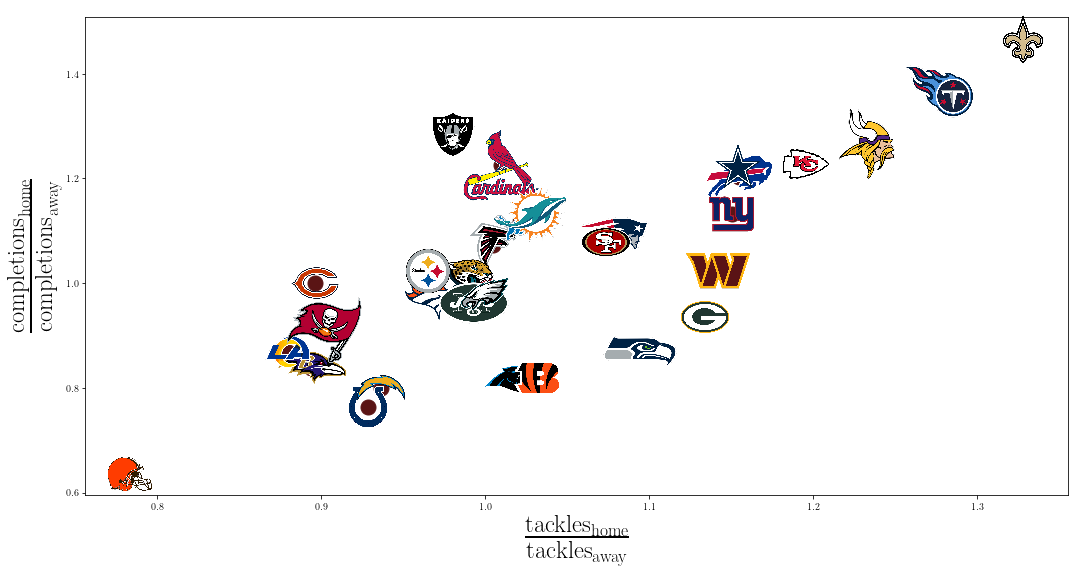

In [54]:
fig, ax = plt.subplots(1,1, figsize=(16,8))

for i, t in enumerate(data.keys()):
    ax.plot(tackles_ratio[i],  completions_ratio[i], marker='.', markersize=30, color=team.color_home)
    
    path = f'logos/{t}.png'
    
    if t=='SEA' or t=='LA' or t=='BUF' or t=='BAL' or t=='DEN' or t=='NYJ' or t=='NE' or t=='TEN' or t=='MIN':
        zoom = .1
    else:
        zoom = .07
    
    ab = AnnotationBbox(getImage(path, zoom=zoom), (tackles_ratio[i], completions_ratio[i]), frameon=False)
    ax.add_artist(ab)


ax.set_xlabel(r'$\frac{\mathrm{tackles}_{\mathrm{home}}}{\mathrm{tackles}_{\mathrm{away}}}$', fontsize=35)    
ax.set_ylabel(r'$\frac{\mathrm{completions}_{\mathrm{home}}}{\mathrm{completions}_{\mathrm{away}}}$',fontsize=35)

fig.tight_layout()

In [45]:
np.corrcoef(C_ratio, tackles_ratio), np.corrcoef(C_ratio, completions_ratio), np.corrcoef(tackles_ratio, completions_ratio)

(array([[ 1.        , -0.08854763],
        [-0.08854763,  1.        ]]),
 array([[ 1.        , -0.02920465],
        [-0.02920465,  1.        ]]),
 array([[1.        , 0.76123373],
        [0.76123373, 1.        ]]))

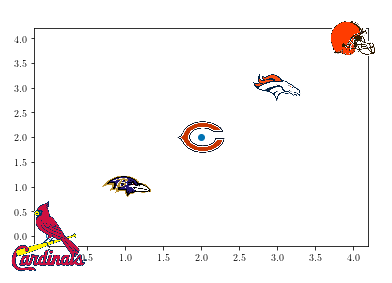

In [19]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

def getImage(path, zoom=.07):
    return OffsetImage(plt.imread(path), zoom=zoom)

paths = [
    'logos/ARI.png',
    'logos/BAL.png',
    'logos/CHI.png',
    'logos/DEN.png',
    'logos/CLE.png']
    
x = [0,1,2,3,4]
y = [0,1,2,3,4]

fig, ax = plt.subplots()
ax.scatter(x, y) 

for x0, y0, path in zip(x, y,paths):
    ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
    ax.add_artist(ab)